In [ ]:
!pip install spotipy -q

     |████████████████████████████████| 139 kB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 246 kB 55.5 MB/s 


In [ ]:
import spotipy 
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import sys

In [ ]:
cid = 'xxxxxxxxxxxxx'
secret = 'xxxxxxxxxxxxxx'
client_credentials_manager = SpotifyClientCredentials(client_id = cid , client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
import timeit
start = timeit.default_timer()

artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
  track_results = sp.search(q='year:2022', type='track', limit=50,offset=i,market='DE')
  for i,t in enumerate(track_results['tracks']['items']):
    artist_name.append(t['artists'][0]['name'])
    track_name.append(t['name'])
    track_id.append(t['id'])
    popularity.append(t['popularity'])

stop = timeit.default_timer()
print('Time to run this code (in seconds):' , stop - start)


Time to run this code (in seconds): 6.86123730700001


In [ ]:
print('number of elements in the track_id list:',len(track_id))

number of elements in the track_id list: 1000


In [ ]:
import pandas as pd
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name, 'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head(50)

(1000, 4)


,artist_name,track_name,track_id,popularity
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82
5,Years & Years,Starstruck,5eQU9bUpFTv9pRkfsY5hpt,0
6,Selmon,Molly (feat. Bausa),0BtIXZTbb0cczvMEvZILDJ,61
7,Rhys Lewis,This Time Of Year,1dLHWbYhYDEg9q991EYxts,0
8,Liaze,PARADISE (MIT DIR),2q7jpVfCtcuRwcur9nQeuC,81
9,Il Volo,Christmas Medley: Jingle Bells Rock / Let It S...,5pBtCULQ0WCCt69AdTrkwr,0


In [ ]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  1000 non-null   object
 1   track_name   1000 non-null   object
 2   track_id     1000 non-null   object
 3   popularity   1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped>1].count()

39

In [ ]:
df_tracks.drop_duplicates(subset=['artist_name','track_name'],inplace=True)

In [ ]:
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

0

In [ ]:
df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep = False)].count()


artist_name    0
track_name     0
track_id       0
popularity     0
dtype: int64

In [ ]:
df_tracks.shape

(938, 4)

In [ ]:
start = timeit.default_timer()

rows = []
batchsize = 32
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
  batch = df_tracks['track_id'][i:i+batchsize]
  feature_results = sp.audio_features(batch)
  for i , t in enumerate(feature_results):
    if t == None:
      None_counter = None_counter + 1
    else:
      rows.append(t)

print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print('Time to run this code(in seconds):',stop-start)


Number of tracks where no audio features were available: 1
Time to run this code(in seconds): 4.128763928000012


In [ ]:
print('Number of elements in the track_id list:' , len(rows))

Number of elements in the track_id list: 937


In [ ]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print('Shape of dataset:',df_audio_features.shape)
df_audio_features.head()

Shape of dataset: (937, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.432,0.388,140.082,audio_features,3ujiq7yK4Uan5z4876fHLK,spotify:track:3ujiq7yK4Uan5z4876fHLK,https://api.spotify.com/v1/tracks/3ujiq7yK4Uan...,https://api.spotify.com/v1/audio-analysis/3uji...,185437,4
1,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.187,0.737,139.439,audio_features,4eHkG6yWQ4pD0zqVkV0R5a,spotify:track:4eHkG6yWQ4pD0zqVkV0R5a,https://api.spotify.com/v1/tracks/4eHkG6yWQ4pD...,https://api.spotify.com/v1/audio-analysis/4eHk...,161808,3
2,0.756,0.809,5,-3.655,1,0.0541,0.01730,0.000004,0.660,0.640,109.901,audio_features,3uRUbppUFPsmrccRXSDAjE,spotify:track:3uRUbppUFPsmrccRXSDAjE,https://api.spotify.com/v1/tracks/3uRUbppUFPsm...,https://api.spotify.com/v1/audio-analysis/3uRU...,264847,4
3,0.517,0.609,7,-5.702,1,0.0291,0.06310,0.000000,0.106,0.239,92.093,audio_features,5yghL6Icp8UlkutKGWr6jT,spotify:track:5yghL6Icp8UlkutKGWr6jT,https://api.spotify.com/v1/tracks/5yghL6Icp8Ul...,https://api.spotify.com/v1/audio-analysis/5ygh...,202693,4
4,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.101,0.607,139.901,audio_features,2XRn6Qu0Wd1KvOND8JbaTx,spotify:track:2XRn6Qu0Wd1KvOND8JbaTx,https://api.spotify.com/v1/tracks/2XRn6Qu0Wd1K...,https://api.spotify.com/v1/audio-analysis/2XRn...,179187,4


In [ ]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      937 non-null    float64
 1   energy            937 non-null    float64
 2   key               937 non-null    int64  
 3   loudness          937 non-null    float64
 4   mode              937 non-null    int64  
 5   speechiness       937 non-null    float64
 6   acousticness      937 non-null    float64
 7   instrumentalness  937 non-null    float64
 8   liveness          937 non-null    float64
 9   valence           937 non-null    float64
 10  tempo             937 non-null    float64
 11  type              937 non-null    object 
 12  id                937 non-null    object 
 13  uri               937 non-null    object 
 14  track_href        937 non-null    object 
 15  analysis_url      937 non-null    object 
 16  duration_ms       937 non-null    int64  
 1

In [ ]:
#dropping unnecessary columns
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop,axis=1,inplace=True)

df_audio_features.rename(columns={'id':'track_id'},inplace=True)

df_audio_features.shape

(937, 14)

In [ ]:
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print('Shape of the dataset:',df_audio_features.shape)
df.head()

Shape of the dataset: (937, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.432,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.187,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.01730,0.000004,0.660,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.06310,0.000000,0.106,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.101,0.607,139.901,179187,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 0 to 936
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       937 non-null    object 
 1   track_name        937 non-null    object 
 2   track_id          937 non-null    object 
 3   popularity        937 non-null    int64  
 4   danceability      937 non-null    float64
 5   energy            937 non-null    float64
 6   key               937 non-null    int64  
 7   loudness          937 non-null    float64
 8   mode              937 non-null    int64  
 9   speechiness       937 non-null    float64
 10  acousticness      937 non-null    float64
 11  instrumentalness  937 non-null    float64
 12  liveness          937 non-null    float64
 13  valence           937 non-null    float64
 14  tempo             937 non-null    float64
 15  duration_ms       937 non-null    int64  
 16  time_signature    937 non-null    int64  
dt

In [ ]:
df[df.duplicated(subset=['artist_name','track_name'],keep=False)]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [ ]:
#creating a csv file
df.to_csv('spotify_data.csv')

from google.colab import files

files.download("spotify_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

pd.options.display.max_columns = None
%matplotlib inline



In [ ]:
dataset = pd.read_csv('/content/spotify_data.csv',index_col=[0])
dataset.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.432,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.187,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.01730,0.000004,0.660,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.06310,0.000000,0.106,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.101,0.607,139.901,179187,4


In [ ]:
sorted_dataset = dataset.sort_values(by=['popularity'],ascending=False)
sorted_dataset.head(20)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
302,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,100,0.621,0.782,2,-5.548,1,0.0440,0.012500,0.033000,0.2300,0.550,128.033,198938,4
375,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,99,0.911,0.712,1,-5.105,0,0.0817,0.090100,0.000027,0.0933,0.425,92.005,178567,4
656,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,98,0.650,0.715,5,-5.198,0,0.2530,0.099300,0.000291,0.1260,0.187,106.672,243717,4
90,Joji,Glimpse of Us,6xGruZOHLs39ZbVccQTuPZ,97,0.440,0.317,8,-9.258,1,0.0531,0.891000,0.000005,0.1410,0.268,169.914,233456,3
54,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,97,0.520,0.731,6,-5.338,0,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303,4
604,Bad Bunny,Ojitos Lindos,3k3NWokhRRkEPhCzPmV8TW,96,0.647,0.686,3,-5.745,0,0.0413,0.080000,0.000001,0.5280,0.268,79.928,258299,4
891,Bad Bunny,Moscow Mule,6Xom58OOXk2SoU711L2IXO,95,0.804,0.674,5,-5.453,0,0.0333,0.294000,0.000001,0.1150,0.292,99.968,245940,4
513,KAROL G,PROVENZA,7dSZ6zGTQx66c2GF91xCrb,94,0.870,0.516,1,-8.006,1,0.0541,0.656000,0.008230,0.1100,0.530,111.005,210200,4
202,Charlie Puth,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,94,0.881,0.592,2,-4.898,1,0.0324,0.619000,0.000013,0.0901,0.719,101.058,154487,4
164,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,93,0.714,0.728,10,-4.595,1,0.0468,0.298000,0.000000,0.1060,0.901,114.996,177955,4


Sorted Dataset does not tell much about what type of music Germans listen .
Popularity in a particular country isn't being taken into consideration. Popularity parameter here refers to the global popularity, it's not that relevant when measuring a song's popularity among a non-english speaking population sample.


In [ ]:
#shape of the dataset
print('Data Frame Dimensions')
print(f'Rows: {dataset.shape[0]}')
print(f'Columns:{dataset.shape[1]}')


Data Frame Dimensions
Rows: 937
Columns:17


In [ ]:
dataset.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000
mean,35.383138,0.643089,0.658451,5.493063,-8.153351,0.558164,0.123151,0.236316,0.184041,0.190916,0.500802,122.447491,2.284386e+05,3.935966
std,34.907317,0.160193,0.213847,3.725949,4.795819,0.496871,0.132667,0.276983,0.332744,0.146740,0.245754,25.604437,2.536215e+05,0.378591
min,0.000000,0.095500,0.010900,0.000000,-39.424000,0.000000,0.023200,0.000000,0.000000,0.019000,0.025400,63.495000,2.000000e+04,1.000000
25%,0.000000,0.553000,0.531000,2.000000,-9.523000,0.000000,0.041400,0.020500,0.000000,0.096600,0.325000,102.107000,1.552800e+05,4.000000
50%,16.000000,0.669000,0.681000,6.000000,-6.892000,1.000000,0.068700,0.126000,0.000066,0.128000,0.508000,124.034000,1.868280e+05,4.000000
75%,67.000000,0.759000,0.817000,9.000000,-5.287000,1.000000,0.153000,0.341000,0.126000,0.254000,0.687000,139.439000,2.365330e+05,4.000000
max,100.000000,0.964000,0.999000,11.000000,1.526000,1.000000,0.930000,0.996000,0.977000,0.950000,0.972000,200.067000,4.585105e+06,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b90d7b750>,
      dtype=object)

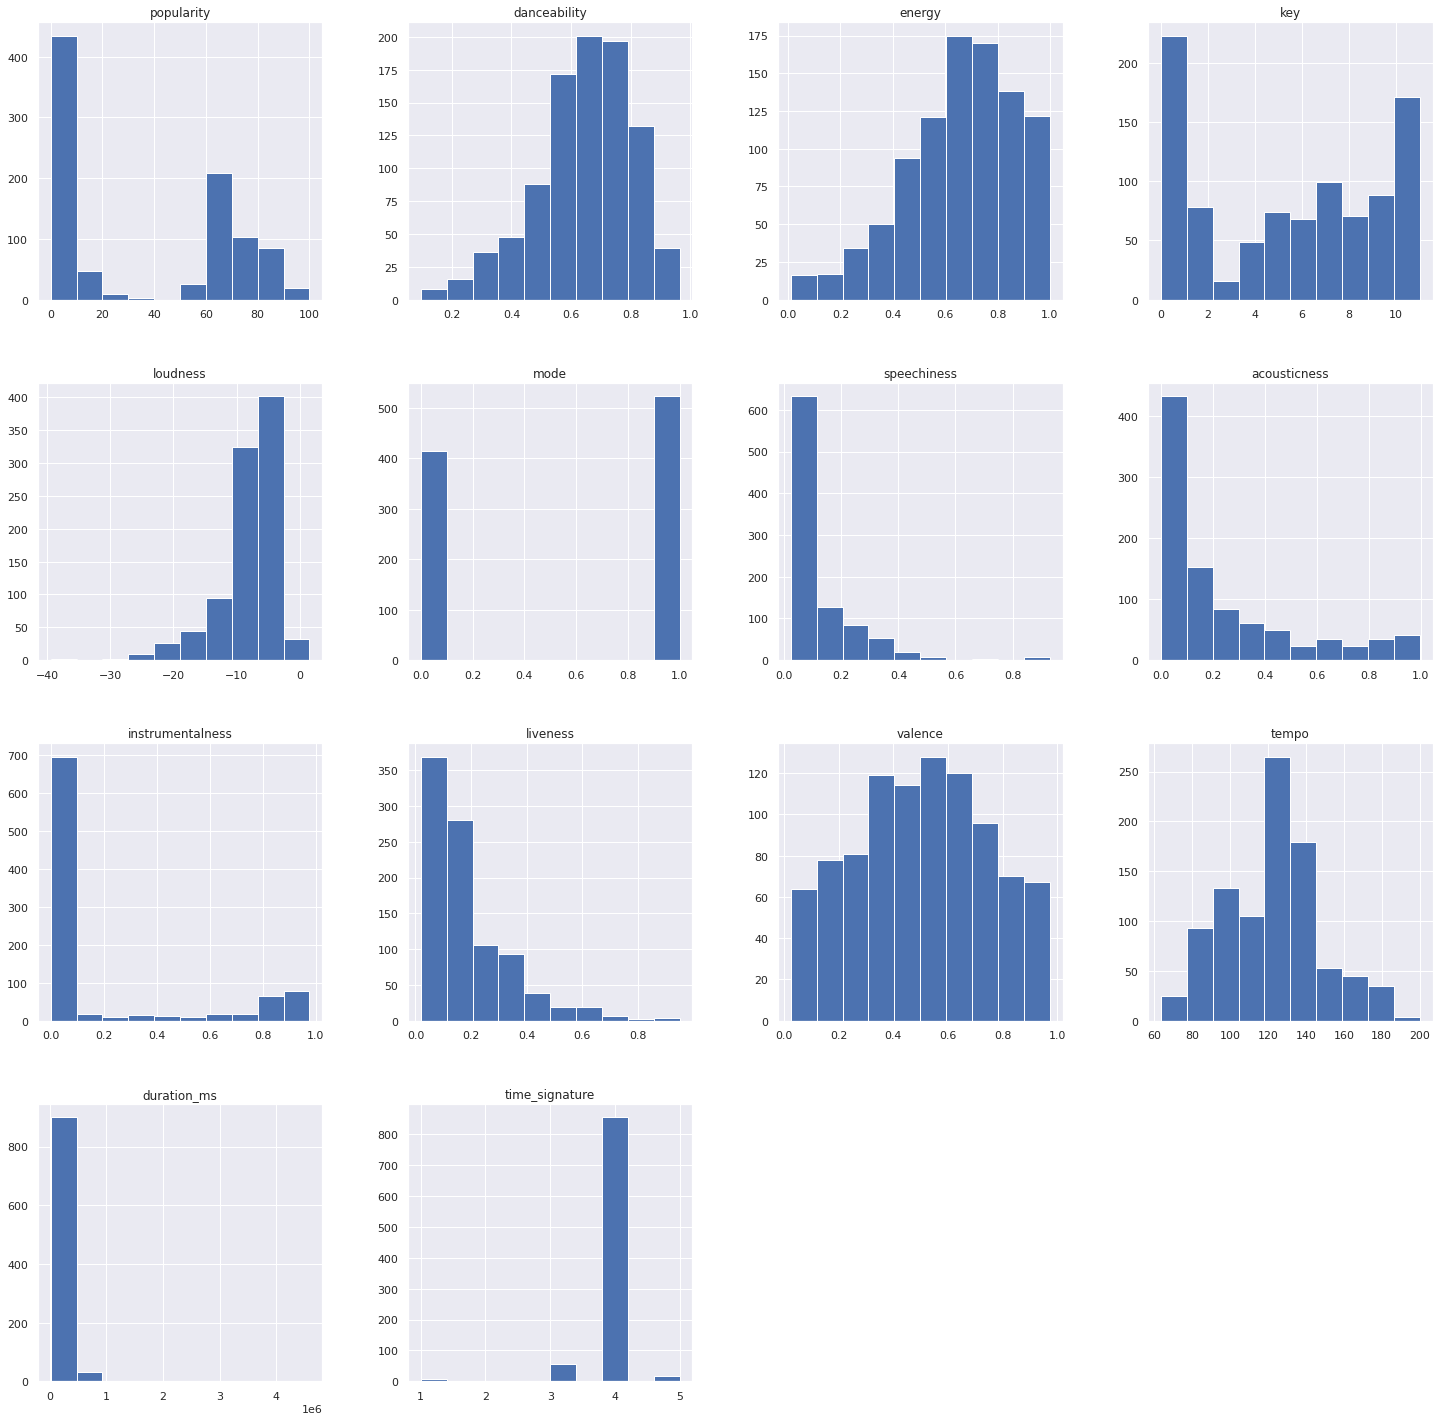

In [ ]:
dataset.hist(figsize=(25,25))

In [ ]:
#unique values
print('Unique Values:')
print(dataset.nunique().sort_values())

Unique Values:
mode                  2
time_signature        4
key                  12
popularity           73
danceability        465
liveness            502
energy              531
artist_name         549
instrumentalness    564
speechiness         585
valence             608
acousticness        742
track_name          891
tempo               901
loudness            902
duration_ms         912
track_id            937
dtype: int64


In [ ]:
dataset.describe(include = 'O')

,artist_name,track_name,track_id
count,937,937,937
unique,549,891,937
top,Babe Ruth,Happy New Year 2022,3ujiq7yK4Uan5z4876fHLK
freq,28,18,1


In [ ]:
n = 10
print('Most Famous Artists in Germany:')
dataset['artist_name'].value_counts()[:n]


Most Famous Artists in Germany:


Babe Ruth                     28
Time Shard                    23
Workout Music                 20
Blinky Blinky Computerband    19
Justin Bieber                 12
Eikichi Yazawa                12
Master                        12
Harry Styles                  10
Tream                         10
haruka nakamura                9
Name: artist_name, dtype: int64

In [ ]:
dataset_top = dataset.copy()
dataset_top = dataset_top.iloc[:150]
dataset_top.head(20)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.001340,0.000000,0.4320,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.159000,0.000000,0.1870,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.017300,0.000004,0.6600,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.063100,0.000000,0.1060,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.287000,0.000796,0.1010,0.607,139.901,179187,4
5,Years & Years,Starstruck,5eQU9bUpFTv9pRkfsY5hpt,0,0.555,0.879,9,-2.484,0,0.0983,0.011000,0.000000,0.2980,0.691,113.852,207755,4
6,Selmon,Molly (feat. Bausa),0BtIXZTbb0cczvMEvZILDJ,61,0.817,0.679,1,-6.469,1,0.1740,0.025600,0.000004,0.0719,0.349,154.972,159822,4
7,Rhys Lewis,This Time Of Year,1dLHWbYhYDEg9q991EYxts,0,0.494,0.290,7,-10.129,1,0.0299,0.904000,0.000002,0.0818,0.238,77.336,222856,4
8,Liaze,PARADISE (MIT DIR),2q7jpVfCtcuRwcur9nQeuC,81,0.666,0.534,2,-8.495,0,0.0828,0.269000,0.000873,0.0680,0.392,139.998,192976,4
9,Il Volo,Christmas Medley: Jingle Bells Rock / Let It S...,5pBtCULQ0WCCt69AdTrkwr,0,0.427,0.587,2,-5.527,1,0.0330,0.642000,0.000000,0.3150,0.579,130.144,219160,4


In [ ]:
dataset_top.describe(include = 'O')


,artist_name,track_name,track_id
count,150,150,150
unique,101,149,150
top,Babe Ruth,Seven Years,3ujiq7yK4Uan5z4876fHLK
freq,27,2,1


In [ ]:
n = 10
print('Most Popular Artists in Germany')
dataset_top['artist_name'].value_counts()[:n]

Most Popular Artists in Germany


Babe Ruth                    27
Johann Strauss II             8
Josef Strauss                 4
Miksu / Macloud               2
Topic                         2
Eikichi Yazawa                2
Joseph Hellmesberger, Jr.     2
Montez                        2
Bonez MC                      2
Kontra K                      2
Name: artist_name, dtype: int64

In [ ]:
#top songs from Top Artists
dataset_top.loc[dataset['artist_name'] == 'Johann Strauss II']

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
36,Johann Strauss II,Die Fledermaus: Overtüre,2VIefSHPIMd7B6QPpX54Qu,19,0.319,0.1480,2,-19.195,1,0.0438,0.948,0.811,0.1990,0.164,95.359,513000,3
45,Johann Strauss II,"Phönix-Schwingen, Walzer, Op. 125",332ERDsBLIekg5IZDwb2tB,18,0.418,0.1250,2,-20.471,1,0.0324,0.936,0.811,0.1420,0.356,97.058,434000,3
47,Johann Strauss II,"Morgenblätter, Walzer, Op. 279",5aEWmo58rXyIpeK4WSWqeu,17,0.350,0.1270,7,-18.467,1,0.0351,0.940,0.893,0.0772,0.216,101.419,649000,4
61,Johann Strauss II,"An der schönen blauen Donau, Walzer, Op. 314",0DSg1rFnpdc9RhNKCYOF3s,15,0.229,0.0720,2,-19.892,1,0.0353,0.965,0.866,0.0682,0.171,82.918,616000,4
63,Johann Strauss II,"Champagner-Polka, Op. 211",0ceAZnQanR0on8E9HLmZK2,15,0.581,0.2150,3,-20.230,1,0.0372,0.912,0.919,0.1740,0.838,127.378,146000,4
65,Johann Strauss II,"Auf der Jagd, Polka schnell, Op. 373",0NQlZbWIFXIkKIhFsMH1ZI,15,0.493,0.4200,9,-15.651,1,0.0427,0.929,0.901,0.0625,0.580,89.198,132000,4
67,Johann Strauss II,"Tausend und eine Nacht, Walzer, Op. 346",4Phjc732ZJc6In2gHETidu,15,0.309,0.0676,0,-20.896,1,0.0342,0.964,0.749,0.0593,0.145,103.766,511000,4
75,Johann Strauss II,"Persischer Marsch, Op. 289",6nFdjYo1hSmGPSmKiqFjN9,15,0.560,0.3060,7,-16.114,0,0.0276,0.910,0.885,0.0715,0.547,96.301,134000,4


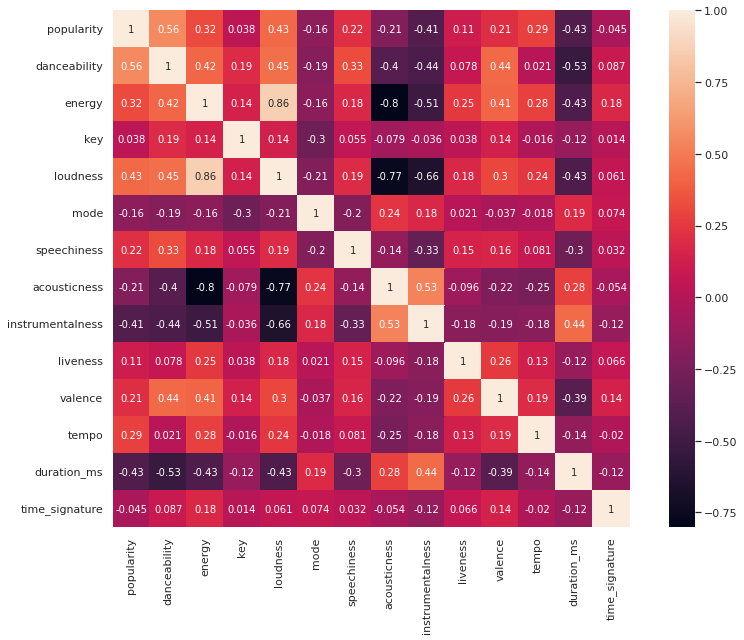

In [ ]:
#creating a correlation matrix

corr = dataset_top.corr()

f,ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr , square = True , linecolor='white' , vmax = 1.0, annot = True)
plt.tight_layout()

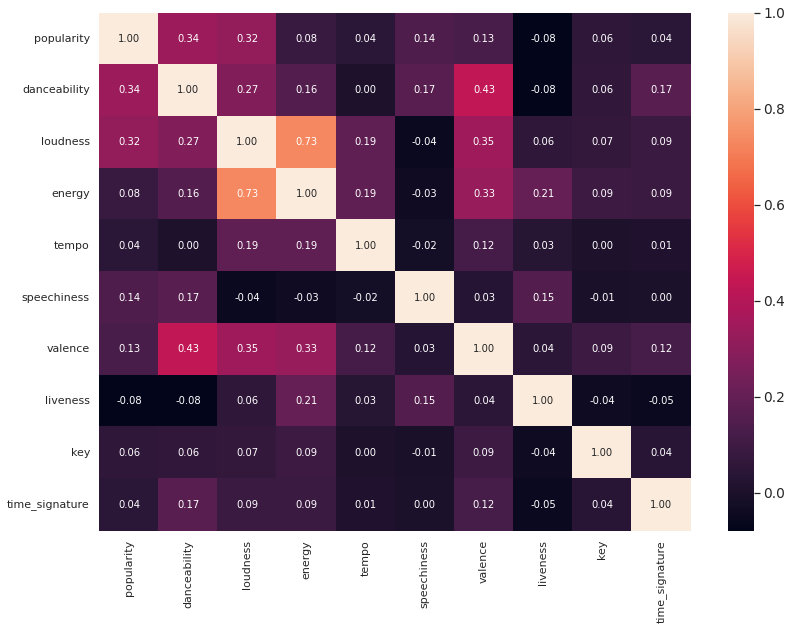

In [ ]:
#focused heatmap
k = 10

cols = corr.nlargest(k,'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f , ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm , cbar = True , annot = True , fmt = '.2f' , annot_kws = {'size' : 10},yticklabels=cols.values , xticklabels=cols.values)
plt.tight_layout()

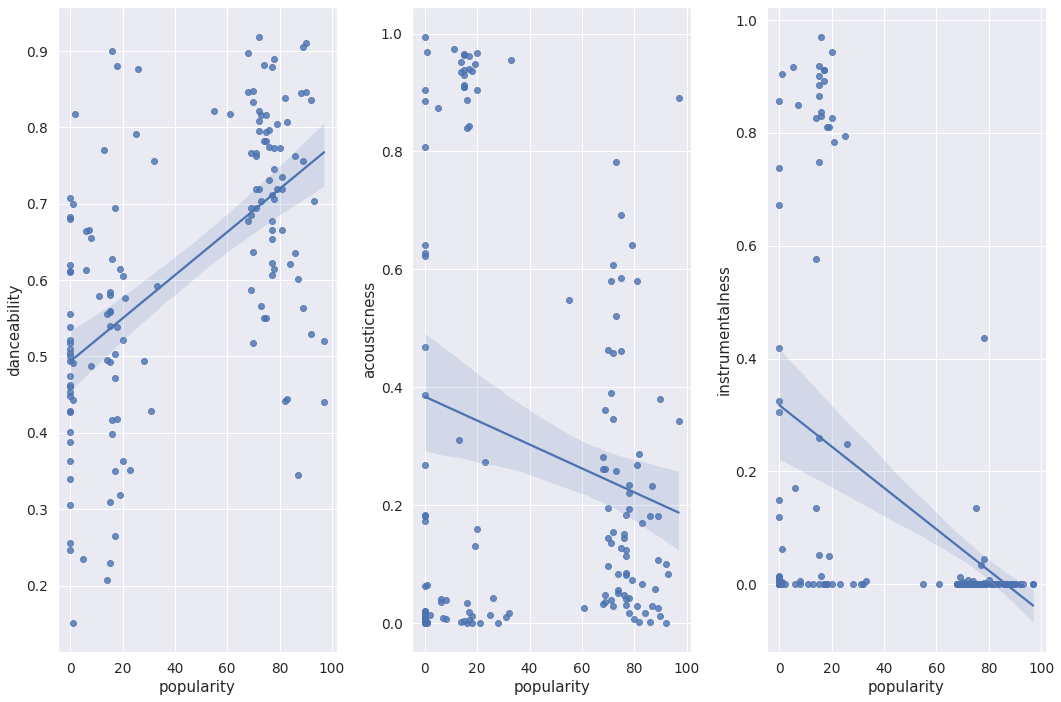

In [ ]:
#lets see parameters like 'Danceability' , 'Acousticness' , 'Intrumentalness' , 'energy' , 'loudness' influence popularity

fig, (ax1, ax2 , ax3) = plt.subplots(ncols=3, sharex=True , figsize=(15,10))
sns.regplot(x=dataset_top['popularity'] , y = dataset_top['danceability'] , ax = ax1)
sns.regplot(x=dataset_top['popularity'] , y = dataset_top['acousticness'] , ax = ax2)
sns.regplot(x=dataset_top['popularity'] , y = dataset_top['instrumentalness'] , ax = ax3)
plt.tight_layout()

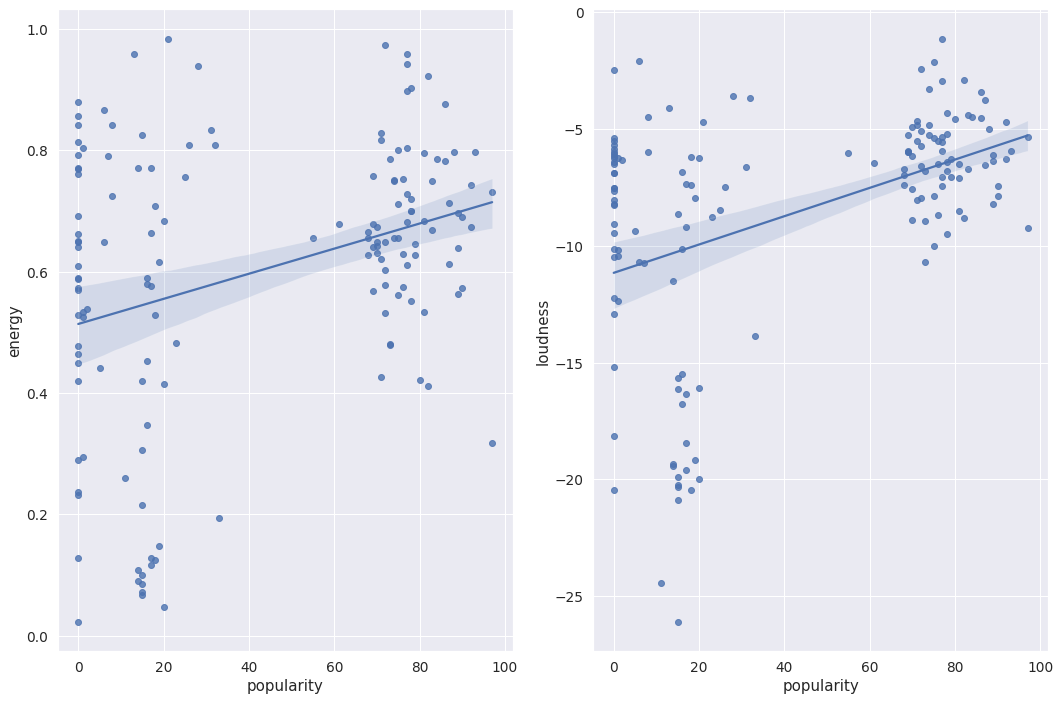

In [ ]:
fig, (ax1 , ax2) = plt.subplots(ncols=2,sharex=True, figsize=(15,10))

sns.regplot(x=dataset_top['popularity'] , y = dataset_top['energy'] , ax = ax1)
sns.regplot(x=dataset_top['popularity'] , y = dataset_top['loudness'] , ax = ax2)
plt.tight_layout()

In [ ]:
#clustering

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
#creating a copy of our dataset

dataset_cluster = dataset.copy()
dataset_cluster = dataset_cluster.iloc[:300]

In [ ]:
dataset_cluster.head(20)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.001340,0.000000,0.4320,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.159000,0.000000,0.1870,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.017300,0.000004,0.6600,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.063100,0.000000,0.1060,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.287000,0.000796,0.1010,0.607,139.901,179187,4
5,Years & Years,Starstruck,5eQU9bUpFTv9pRkfsY5hpt,0,0.555,0.879,9,-2.484,0,0.0983,0.011000,0.000000,0.2980,0.691,113.852,207755,4
6,Selmon,Molly (feat. Bausa),0BtIXZTbb0cczvMEvZILDJ,61,0.817,0.679,1,-6.469,1,0.1740,0.025600,0.000004,0.0719,0.349,154.972,159822,4
7,Rhys Lewis,This Time Of Year,1dLHWbYhYDEg9q991EYxts,0,0.494,0.290,7,-10.129,1,0.0299,0.904000,0.000002,0.0818,0.238,77.336,222856,4
8,Liaze,PARADISE (MIT DIR),2q7jpVfCtcuRwcur9nQeuC,81,0.666,0.534,2,-8.495,0,0.0828,0.269000,0.000873,0.0680,0.392,139.998,192976,4
9,Il Volo,Christmas Medley: Jingle Bells Rock / Let It S...,5pBtCULQ0WCCt69AdTrkwr,0,0.427,0.587,2,-5.527,1,0.0330,0.642000,0.000000,0.3150,0.579,130.144,219160,4


In [ ]:
dataset_cluster.to_csv('dataset_Germany.csv' , index = 0)

In [ ]:
X = pd.DataFrame(dataset_cluster.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

In [ ]:
dataset_cluster.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
cols = dataset_cluster.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns

In [ ]:
X.columns = cols

In [ ]:
X.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,82.0,0.442,0.922,5.0,-2.918,0.0,0.0695,0.00134,0.000000,0.432,0.388,140.082,185437.0,4.0
1,20.0,0.521,0.683,5.0,-6.240,0.0,0.5010,0.15900,0.000000,0.187,0.737,139.439,161808.0,3.0
2,32.0,0.756,0.809,5.0,-3.655,1.0,0.0541,0.01730,0.000004,0.660,0.640,109.901,264847.0,4.0
3,0.0,0.517,0.609,7.0,-5.702,1.0,0.0291,0.06310,0.000000,0.106,0.239,92.093,202693.0,4.0
4,82.0,0.839,0.412,11.0,-8.816,0.0,0.0935,0.28700,0.000796,0.101,0.607,139.901,179187.0,4.0


In [ ]:
print(X.shape)
dataset_cluster.head()

(300, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.432,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.187,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.01730,0.000004,0.660,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.06310,0.000000,0.106,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.101,0.607,139.901,179187,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [ ]:
scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.845361,0.378906,0.927828,0.454545,0.935619,0.0,0.093763,0.001347,0.000000,0.548473,0.380108,0.615310,0.036394,0.75
1,0.206186,0.481771,0.681410,0.454545,0.846652,0.0,0.967598,0.159799,0.000000,0.223108,0.750557,0.610087,0.028584,0.50
2,0.329897,0.787760,0.811321,0.454545,0.915881,1.0,0.062576,0.017387,0.000004,0.851262,0.647596,0.370150,0.062643,0.75
3,0.000000,0.476562,0.605114,0.636364,0.861061,1.0,0.011948,0.063417,0.000000,0.115538,0.221951,0.225495,0.042098,0.75
4,0.845361,0.895833,0.402000,1.000000,0.777665,0.0,0.142365,0.288442,0.000820,0.108898,0.612568,0.613840,0.034328,0.75


In [ ]:
scaled.shape

(300, 14)

In [ ]:
scaled = scaler.fit_transform(X)

In [ ]:
scaled.shape

(300, 14)

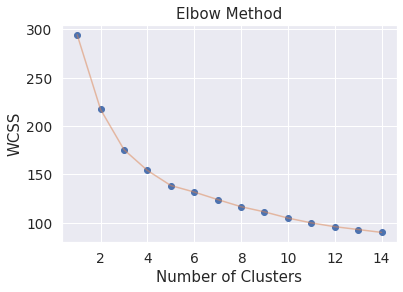

In [ ]:
#Elbow Method
# finding out the proper number of clusters
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
wcss

[294.5345653007188,
 217.2179254477265,
 175.59441432323206,
 154.10669494027405,
 138.50389870238624,
 131.75819019828822,
 123.96969003260423,
 116.57196961749838,
 111.23310179522755,
 104.85936663119537,
 99.836636875392,
 95.90575372026449,
 92.98797930560217,
 89.98072437457057]

In [ ]:
#instantiating model
kmeans = KMeans(n_clusters = 6 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

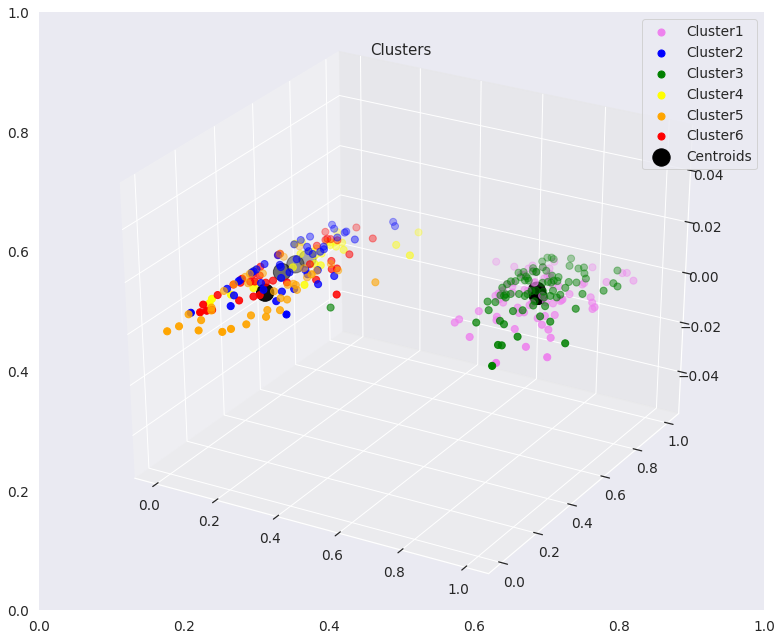

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig , ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s = 50 , c = 'violet', label = 'Cluster1')
plt.scatter(scaled[y_kmeans == 1,0],scaled[y_kmeans == 1,1], s = 50 , c = 'blue', label = 'Cluster2')
plt.scatter(scaled[y_kmeans == 2,0],scaled[y_kmeans == 2,1], s = 50 , c = 'green', label = 'Cluster3')
plt.scatter(scaled[y_kmeans == 3,0],scaled[y_kmeans == 3,1], s = 50 , c = 'yellow', label = 'Cluster4')
plt.scatter(scaled[y_kmeans == 4,0],scaled[y_kmeans == 4,1], s = 50 , c = 'orange', label = 'Cluster5')
plt.scatter(scaled[y_kmeans == 5,0],scaled[y_kmeans == 5,1], s = 50 , c = 'red', label = 'Cluster6')


#centroids
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 300 , c = 'black' , label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
y_kmeans

array([2, 1, 3, 3, 2, 1, 0, 4, 2, 5, 0, 4, 2, 1, 2, 3, 2, 5, 2, 2, 4, 2,
       1, 2, 2, 2, 5, 2, 5, 0, 3, 2, 4, 0, 3, 0, 4, 2, 5, 0, 4, 0, 4, 0,
       2, 4, 2, 4, 0, 4, 2, 2, 0, 4, 2, 4, 2, 1, 2, 3, 2, 4, 0, 4, 2, 4,
       0, 4, 2, 4, 0, 1, 0, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 0, 1, 0, 5,
       0, 1, 0, 4, 0, 5, 2, 1, 2, 1, 0, 1, 1, 0, 1, 5, 0, 1, 0, 1, 0, 4,
       2, 3, 0, 3, 1, 0, 3, 1, 4, 1, 0, 3, 0, 5, 0, 1, 2, 5, 2, 5, 2, 5,
       2, 4, 2, 5, 2, 5, 2, 1, 0, 3, 0, 1, 2, 5, 2, 1, 2, 1, 0, 5, 2, 1,
       2, 2, 3, 5, 2, 3, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 1,
       2, 4, 2, 1, 5, 2, 3, 2, 1, 2, 3, 2, 5, 2, 1, 2, 5, 2, 5, 2, 0, 3,
       0, 5, 0, 5, 0, 4, 0, 5, 0, 1, 2, 3, 0, 5, 0, 3, 0, 1, 0, 0, 3, 2,
       1, 2, 3, 2, 4, 0, 1, 0, 3, 2, 3, 0, 2, 5, 0, 1, 0, 1, 2, 4, 0, 2,
       3, 0, 3, 2, 1, 3, 2, 1, 2, 5, 0, 1, 0, 3, 0, 5, 2, 1, 2, 5, 2, 5,
       2, 3, 0, 1, 0, 3, 0, 1, 0, 5, 0, 3, 2, 1, 0, 5, 2, 5, 2, 1, 2, 5,
       0, 5, 0, 1, 0, 3, 0, 5, 2, 5, 0, 1, 0, 3], d

In [ ]:
# converting predictions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

print(kmeans.shape)
kmeans.head(20)

(300, 1)


,k_cluster
0,2
1,1
2,3
3,3
4,2
5,1
6,0
7,4
8,2
9,5


In [ ]:
dataset_cluster.head(20)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.001340,0.000000,0.4320,0.388,140.082,185437,4
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.159000,0.000000,0.1870,0.737,139.439,161808,3
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.017300,0.000004,0.6600,0.640,109.901,264847,4
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.063100,0.000000,0.1060,0.239,92.093,202693,4
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.287000,0.000796,0.1010,0.607,139.901,179187,4
5,Years & Years,Starstruck,5eQU9bUpFTv9pRkfsY5hpt,0,0.555,0.879,9,-2.484,0,0.0983,0.011000,0.000000,0.2980,0.691,113.852,207755,4
6,Selmon,Molly (feat. Bausa),0BtIXZTbb0cczvMEvZILDJ,61,0.817,0.679,1,-6.469,1,0.1740,0.025600,0.000004,0.0719,0.349,154.972,159822,4
7,Rhys Lewis,This Time Of Year,1dLHWbYhYDEg9q991EYxts,0,0.494,0.290,7,-10.129,1,0.0299,0.904000,0.000002,0.0818,0.238,77.336,222856,4
8,Liaze,PARADISE (MIT DIR),2q7jpVfCtcuRwcur9nQeuC,81,0.666,0.534,2,-8.495,0,0.0828,0.269000,0.000873,0.0680,0.392,139.998,192976,4
9,Il Volo,Christmas Medley: Jingle Bells Rock / Let It S...,5pBtCULQ0WCCt69AdTrkwr,0,0.427,0.587,2,-5.527,1,0.0330,0.642000,0.000000,0.3150,0.579,130.144,219160,4


In [ ]:
dataset_cluster = pd.concat([dataset_cluster, kmeans] , axis = 1)

print(dataset_cluster.shape)
dataset_cluster.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.432,0.388,140.082,185437,4,2
1,Ish Kevin,My Year (2022),4eHkG6yWQ4pD0zqVkV0R5a,20,0.521,0.683,5,-6.240,0,0.5010,0.15900,0.000000,0.187,0.737,139.439,161808,3,1
2,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,32,0.756,0.809,5,-3.655,1,0.0541,0.01730,0.000004,0.660,0.640,109.901,264847,4,3
3,Mabel,Loneliest Time Of Year,5yghL6Icp8UlkutKGWr6jT,0,0.517,0.609,7,-5.702,1,0.0291,0.06310,0.000000,0.106,0.239,92.093,202693,4,3
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.101,0.607,139.901,179187,4,2


In [ ]:
(dataset_cluster.isnull().sum()/dataset_cluster.shape[0]).sort_values(ascending=False)

artist_name         0.0
track_name          0.0
time_signature      0.0
duration_ms         0.0
tempo               0.0
valence             0.0
liveness            0.0
instrumentalness    0.0
acousticness        0.0
speechiness         0.0
mode                0.0
loudness            0.0
key                 0.0
energy              0.0
danceability        0.0
popularity          0.0
track_id            0.0
k_cluster           0.0
dtype: float64

In [ ]:
#popularity mean by cluster
dataset_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
0    76.097222
2    74.166667
4    10.394737
3     8.483871
1     7.545455
5     7.108108
Name: popularity, dtype: float64

In [ ]:
#number of songs in each cluster
dataset_cluster['k_cluster'].value_counts()

2    78
0    72
1    44
4    38
5    37
3    31
Name: k_cluster, dtype: int64

In [ ]:
dataset_cluster.groupby(['k_cluster']).danceability.mean().sort_values(ascending=False)

k_cluster
2    0.728333
0    0.705528
3    0.626419
1    0.587568
5    0.537027
4    0.425132
Name: danceability, dtype: float64

In [ ]:
#songs in each cluster
dataset_cluster.loc[dataset_cluster['k_cluster'] == 2][:20]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,DJ Robin,Layla,3ujiq7yK4Uan5z4876fHLK,82,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,185437,4,2
4,Luciano,Beautiful Girl,2XRn6Qu0Wd1KvOND8JbaTx,82,0.839,0.412,11,-8.816,0,0.0935,0.28700,0.000796,0.1010,0.607,139.901,179187,4,2
8,Liaze,PARADISE (MIT DIR),2q7jpVfCtcuRwcur9nQeuC,81,0.666,0.534,2,-8.495,0,0.0828,0.26900,0.000873,0.0680,0.392,139.998,192976,4,2
12,Miksu / Macloud,Nachts wach,0g2leZuI3jD5pRsrRIDvYe,81,0.719,0.683,6,-7.083,0,0.2550,0.58000,0.000000,0.3040,0.634,136.151,178973,4,2
14,The Weeknd,Sacrifice,1nH2PkJL1XoUq8oE6tBZoU,81,0.735,0.795,11,-6.523,0,0.1130,0.02960,0.000032,0.0678,0.905,122.000,188918,4,2
16,James Hype,Ferrari,4zN21mbAuaD0WqtmaTZZeP,90,0.847,0.690,1,-7.877,0,0.0493,0.01270,0.000060,0.0526,0.692,125.004,186662,4,2
18,Topic,In Your Arms (For An Angel),5WOnsi0Bug74LmhxcPfKvR,71,0.694,0.828,11,-4.653,0,0.0336,0.03990,0.000000,0.0796,0.407,126.002,150476,4,2
19,Kontra K,Follow,2cg9zDi0rvj3HjKxvv2tvY,79,0.719,0.628,8,-6.269,0,0.2110,0.07330,0.000002,0.1190,0.472,139.957,145013,4,2
21,Gunna,pushin P (feat. Young Thug),3XOalgusokruzA5ZBA2Qcb,80,0.773,0.422,1,-4.572,0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267,1,2
23,Miksu / Macloud,Sehnsucht,1W1N3usYjgI3XGQA0iX9Vq,79,0.804,0.645,6,-7.069,0,0.0773,0.64200,0.000000,0.1730,0.912,142.090,152827,4,2


In [ ]:
dataset_cluster.groupby('k_cluster').describe()

popularity                                                       \
               count       mean       std   min    25%   50%    75%   max   
k_cluster                                                                   
0               72.0  76.097222  9.600704  55.0  67.75  74.5  83.00  97.0   
1               44.0   7.545455  6.582056   0.0   0.75   7.5  12.25  23.0   
2               78.0  74.166667  9.107463  31.0  68.00  74.0  79.75  97.0   
3               31.0   8.483871  7.982777   0.0   2.00   7.0  11.00  32.0   
4               38.0  10.394737  8.042252   0.0   2.25  13.5  15.75  33.0   
5               37.0   7.108108  6.927336   0.0   1.00   6.0  10.00  28.0   

          danceability                                                      \
                 count      mean       std    min      25%    50%      75%   
k_cluster                                                                    
0                 72.0  0.705528  0.121831  0.362  0.63450  0.715  0.80700   
1                 44.0  0.587568  0.153882  0.256  0.47075  0.570  0.69300   
2                 78.0  0.728333  0.123450  0.345  0.66850  0.748  0.81575   
3                 31.0  0.626419  0.140011  0.318  0.51050  0.667  0.72350   
4                 38.0  0.425132  0.147370  0.151  0.30300  0.445  0.55350   
5                 37.0  0.537027  0.156155  0.268  0.44300  0.495  0.64300   

                 energy                                                        \
             max  count      mean       std     min      25%     50%      75%   
k_cluster                                                                       
0          0.911   72.0  0.695417  0.149838  0.3170  0.60025  0.6905  0.79800   
1          0.900   44.0  0.713159  0.191234  0.2360  0.57150  0.7550  0.86350   
2          0.919   78.0  0.667282  0.120987  0.3210  0.58350  0.6725  0.75625   
3          0.877   31.0  0.784355  0.124762  0.5340  0.69950  0.7920  0.86950   
4          0.677   38.0  0.268326  0.153216  0.0221  0.12550  0.2720  0.41075   
5          0.831   37.0  0.741135  0.172498  0.4360  0.63900  0.7790  0.88200   

                   key                                                  \
             max count      mean       std  min  25%  50%    75%   max   
k_cluster                                                                
0          0.974  72.0  5.055556  3.826847  0.0  1.0  6.0   8.00  11.0   
1          0.987  44.0  6.522727  3.872915  0.0  4.0  6.5  10.25  11.0   
2          0.922  78.0  5.423077  3.698084  0.0  1.0  6.0   8.00  11.0   
3          0.992  31.0  7.709677  1.716460  4.0  7.0  8.0   9.00  11.0   
4          0.576  38.0  4.710526  3.408320  0.0  2.0  3.5   7.75  11.0   
5          0.984  37.0  1.189189  1.449863  0.0  0.0  1.0   2.00   5.0   

          loudness                                                            \
             count       mean       std     min       25%      50%       75%   
k_cluster                                                                      
0             72.0  -5.874111  2.015255 -11.224  -6.83775  -5.8450  -4.68250   
1             44.0  -8.327659  5.594790 -37.854  -9.32775  -6.8510  -5.68900   
2             78.0  -6.636897  1.728286 -12.876  -7.57175  -6.5765  -5.37475   
3             31.0  -6.378710  2.562598 -10.733  -8.76250  -6.0750  -4.25750   
4             38.0 -16.215526  4.681935 -26.114 -19.81425 -16.2410 -12.53450   
5             37.0  -6.994676  2.017071 -12.775  -8.05900  -6.3120  -5.67800   

                  mode                                              \
             max count      mean      std  min  25%  50%  75%  max   
k_cluster                                                            
0         -0.514  72.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0   
1         -2.089  44.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
2         -2.137  78.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
3         -1.607  31.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0   
4    

In [ ]:
dataset_cluster.to_csv('dataset_cluster.csv',index=0)

In [ ]:
hj = dataset_cluster.iloc[145]
hj


artist_name                                            Babe Ruth
track_name          If Heaven's On Beauty's Side - 2022 Remaster
track_id                                  2Tz9yjMQIyWRbFBoqddQsX
popularity                                                     0
danceability                                               0.463
energy                                                      0.77
key                                                            0
loudness                                                  -5.865
mode                                                           1
speechiness                                                0.159
acousticness                                               0.387
instrumentalness                                        0.000016
liveness                                                    0.28
valence                                                    0.516
tempo                                                    142.974
duration_ms              

In [ ]:

dataset_cluster[dataset_cluster.eq('As It Was').any(1)]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
54,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,97,0.52,0.731,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.662,173.93,167303,4,2


In [ ]:
val = dataset_cluster.loc[dataset_cluster['track_name'] == 'As It Was'].index.values
print(int(val))

54


In [ ]:
def find_cluster(song_name,dataset):
  idx = dataset.loc[dataset['track_name'] == song_name].index.values
  cluster = dataset.iloc[int(idx)].k_cluster
  artist = dataset.iloc[int(idx)].artist_name
  popularity = dataset.iloc[int(idx)].popularity

  return f'Cluster : {cluster} , Artist Name : {artist}  and Popularity : {popularity}'


In [ ]:
find_cluster("As It Was",dataset_cluster)

'Cluster : 2 , Artist Name : Harry Styles  and Popularity : 97'